In [1]:
import psycopg2
import pandas as pd
conn=psycopg2.connect(
    host='localhost',
    dbname='Complete-proj',
    user='postgres',
    password='Misha',
    port=5432
)

In [2]:
query="select * from client_data"

In [3]:
df=pd.read_sql(query, conn)

C:\Users\Hp\AppData\Local\Temp\ipykernel_16208\2733200531.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query, conn)


In [4]:
conn.close()

In [5]:
print(df.head())

  client_id             name  age  location_id joined_bank   banking_contact  \
0  IND81288    Raymond Mills   24        34324  2019-05-06    Anthony Torres   
1  IND65833    Julia Spencer   23        42205  2001-12-10  Jonathan Hawkins   
2  IND47499   Stephen Murray   27         7314  2010-01-25     Anthony Berry   
3  IND72498   Virginia Garza   40        34594  2019-03-28        Steve Diaz   
4  IND60181  Melissa Sanders   46        41269  2012-07-20        Shawn Long   

  nationality            occupation fee_structure loyalty_classification  ...  \
0    American  Safety Technician IV          High                   Jade  ...   
1     African   Software Consultant          High                   Jade  ...   
2    European    Help Desk Operator          High                   Gold  ...   
3    American          Geologist II           Mid                 Silver  ...   
4    American   Assistant Professor           Mid               Platinum  ...   

   bank_deposits  checking_accou

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df.head(5)

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,gender_id,iaid
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [8]:
df.shape

(3000, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_id                 3000 non-null   object 
 1   name                      3000 non-null   object 
 2   age                       3000 non-null   int64  
 3   location_id               3000 non-null   int64  
 4   joined_bank               3000 non-null   object 
 5   banking_contact           3000 non-null   object 
 6   nationality               3000 non-null   object 
 7   occupation                3000 non-null   object 
 8   fee_structure             3000 non-null   object 
 9   loyalty_classification    3000 non-null   object 
 10  estimated_income          3000 non-null   float64
 11  superannuation_savings    3000 non-null   float64
 12  amount_of_credit_cards    3000 non-null   int64  
 13  credit_card_balance       3000 non-null   float64
 14  bank_loa

In [10]:
df.describe()     #gives the quantitative analysis

,age,location_id,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,gender_id,iaid
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [11]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['estimated_income'], bins=bins, labels=labels, right=False)

<Axes: xlabel='Income Band'>

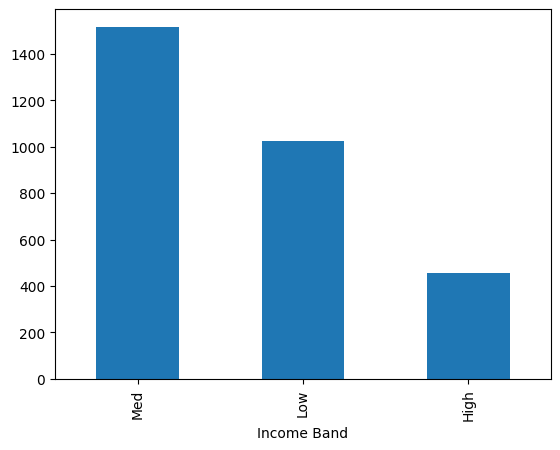

In [12]:
df['Income Band'].value_counts().plot(kind='bar')

In [13]:
df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,gender_id,iaid,Income Band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Med
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Med
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Med


In [14]:
# Examine the distribution of unique cataegories in categorical columns
categorical_cols = df[["brid", "gender_id", "iaid", "amount_of_credit_cards", "nationality", "occupation", "fee_structure", "loyalty_classification", "properties_owned", "risk_weighting", "Income Band"]].columns

for col in categorical_cols:
  print(f"Value Counts for '{col}':")
  display(df[col].value_counts())

Value Counts for 'brid':


brid
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for 'gender_id':


gender_id
2    1512
1    1488
Name: count, dtype: int64

Value Counts for 'iaid':


iaid
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for 'amount_of_credit_cards':


amount_of_credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for 'nationality':


nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for 'occupation':


occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for 'fee_structure':


fee_structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for 'loyalty_classification':


loyalty_classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for 'properties_owned':


properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for 'risk_weighting':


risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for 'Income Band':


Income Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64

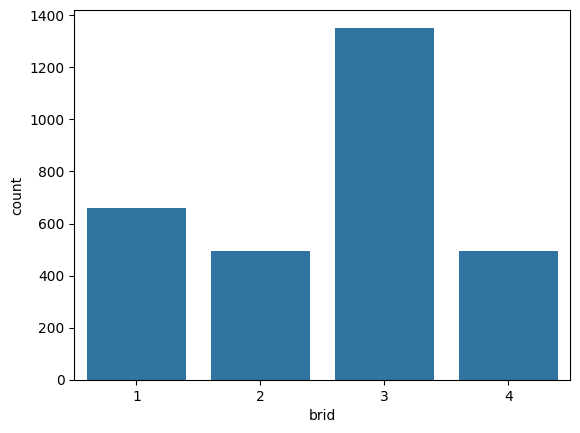

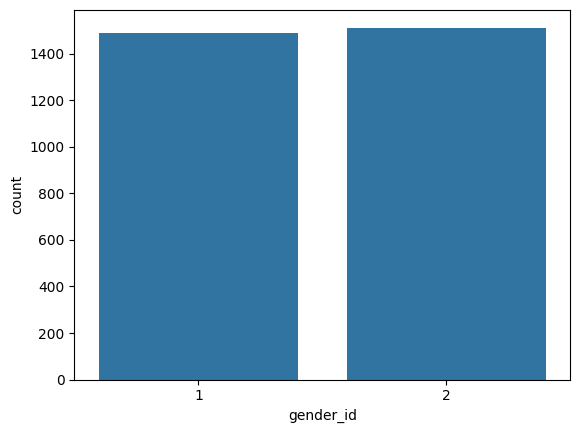

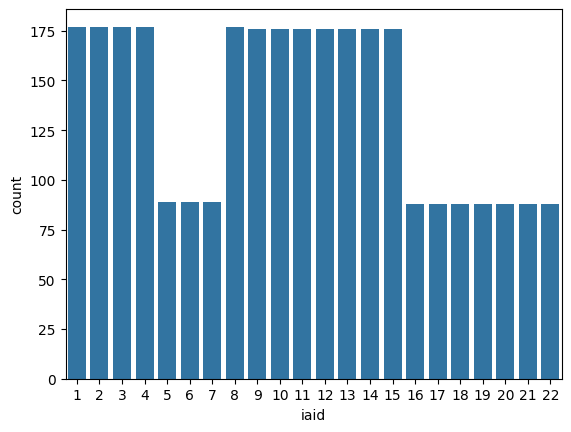

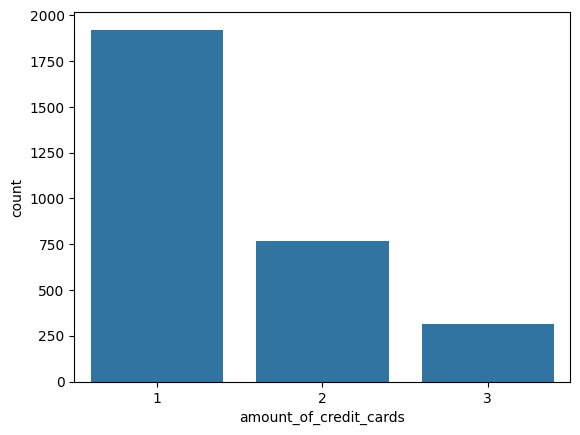

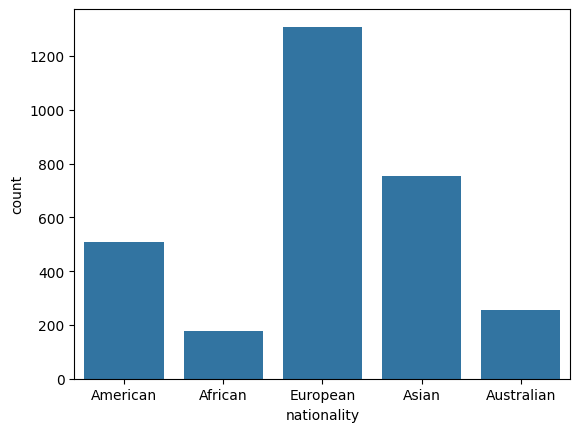

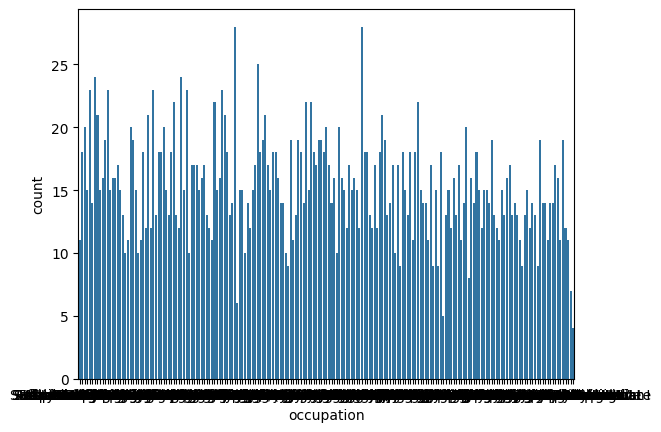

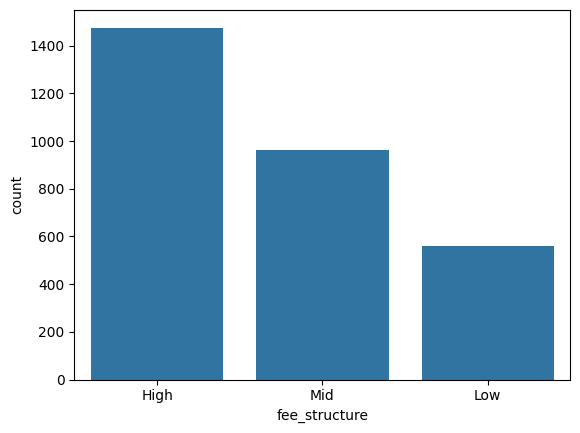

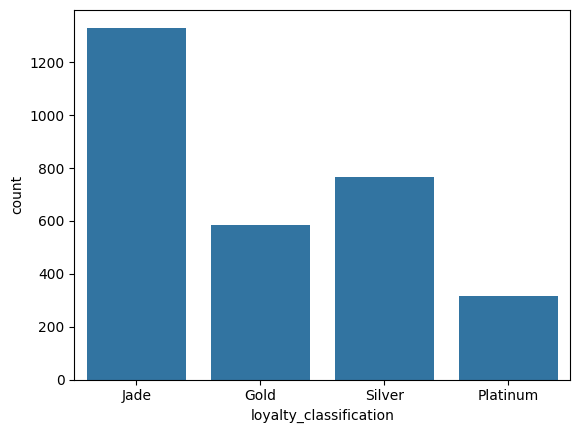

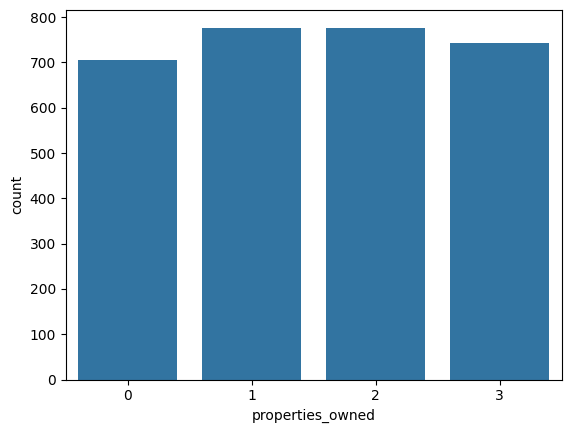

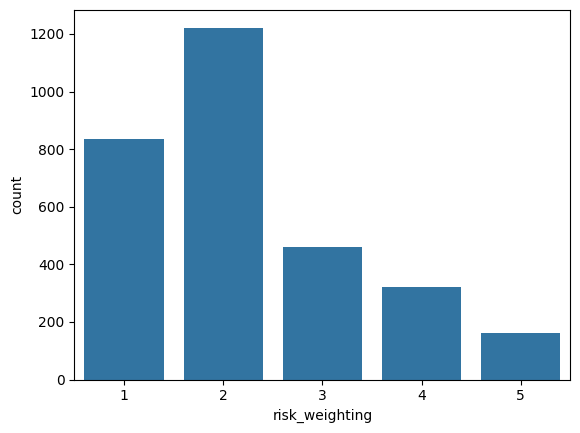

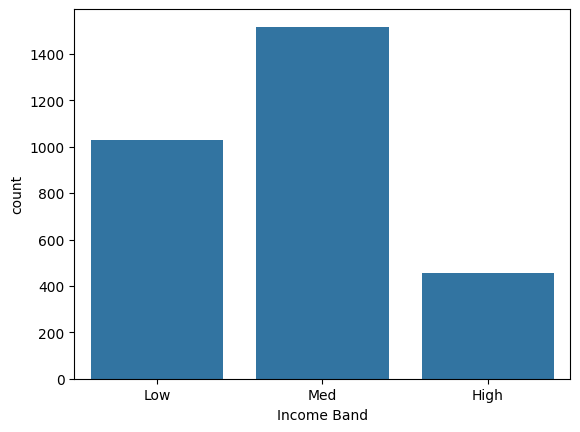

In [15]:
for i, predictor in enumerate(df[["brid", "gender_id", "iaid", "amount_of_credit_cards", "nationality", "occupation", "fee_structure", "loyalty_classification", "properties_owned", "risk_weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor)

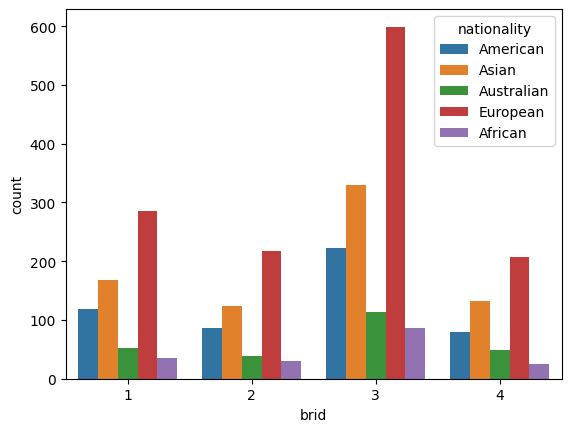

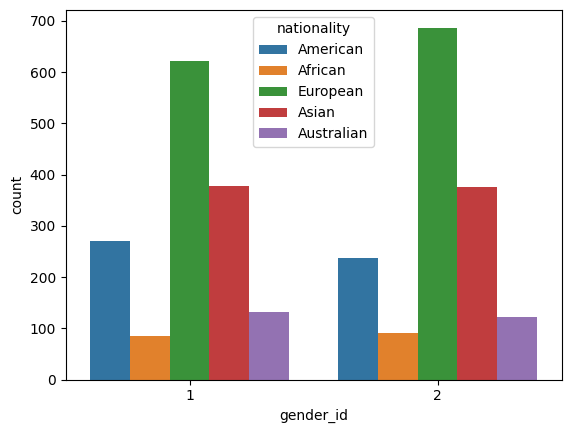

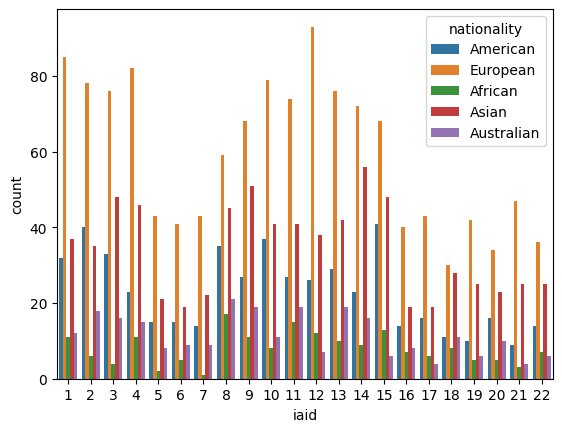

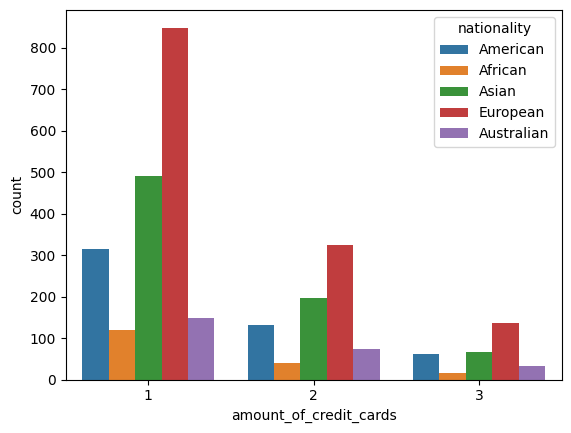

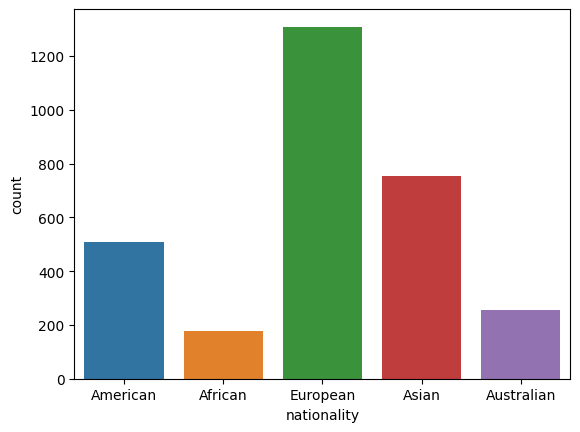

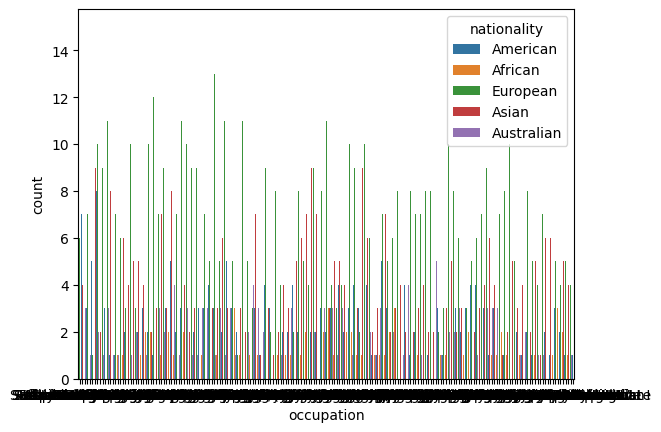

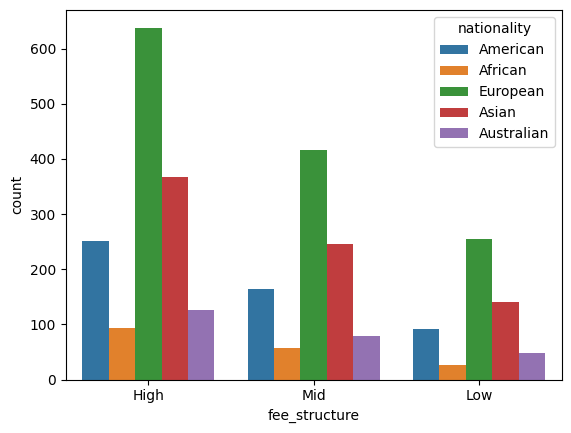

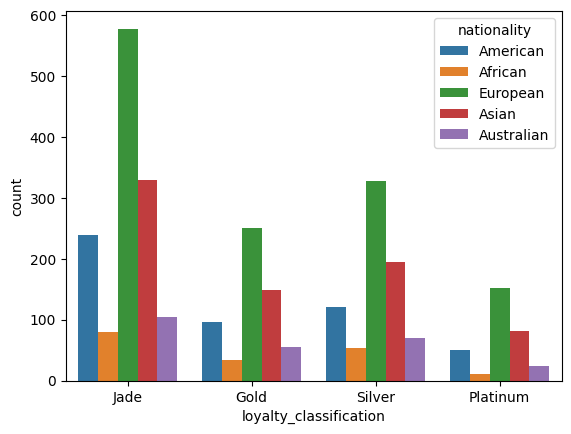

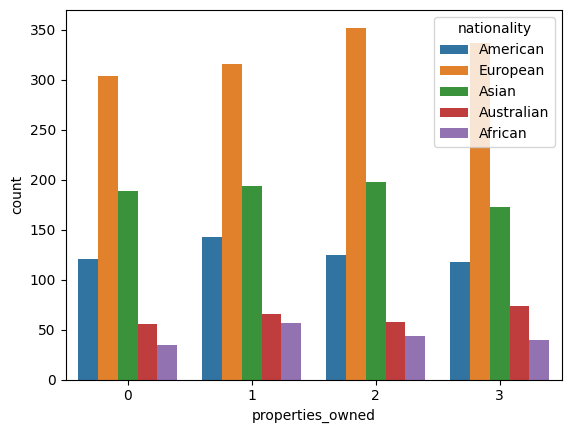

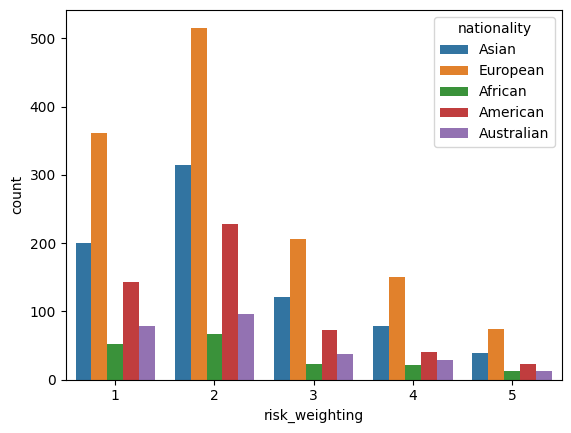

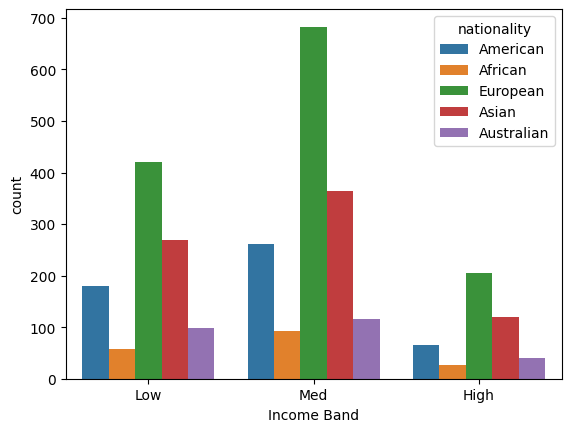

In [16]:
for i, predictor in enumerate(df[["brid", "gender_id", "iaid", "amount_of_credit_cards", "nationality", "occupation", "fee_structure", "loyalty_classification", "properties_owned", "risk_weighting", "Income Band"]].columns):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='nationality')


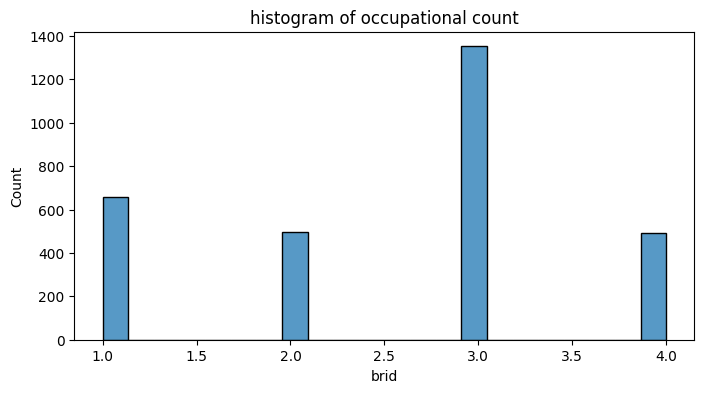

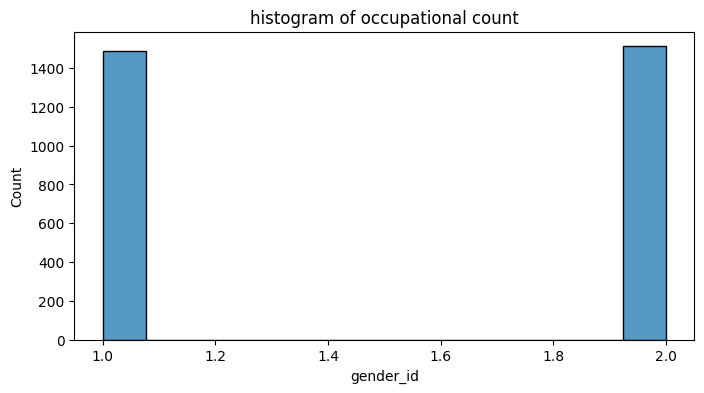

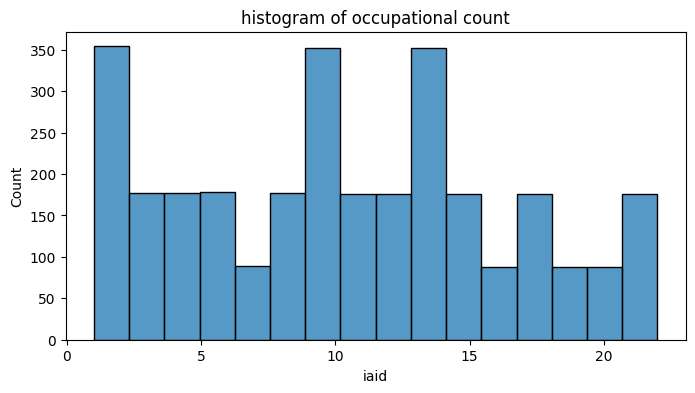

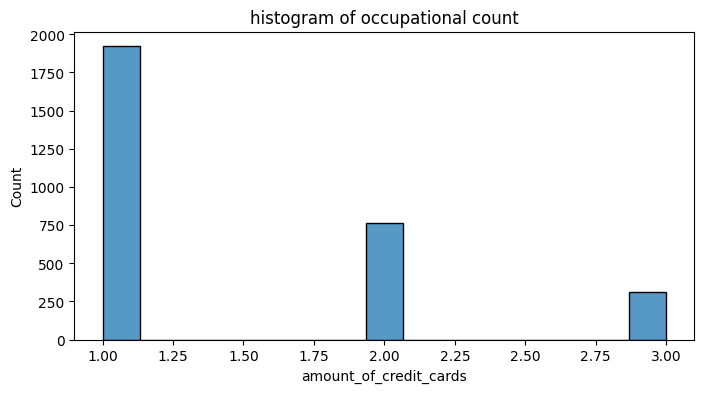

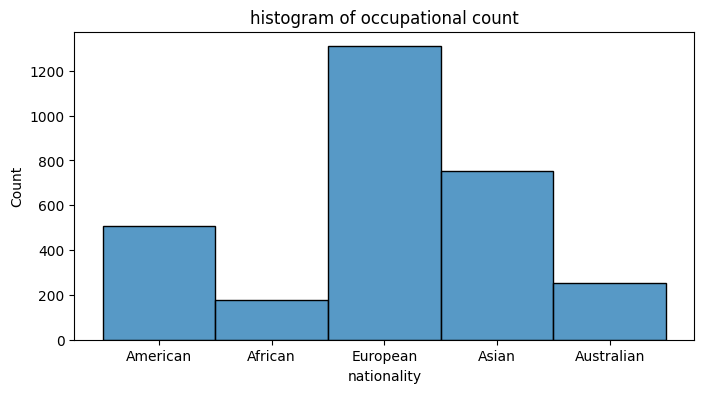

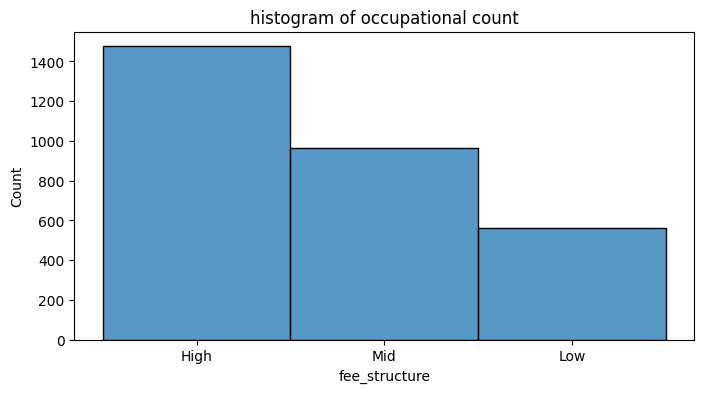

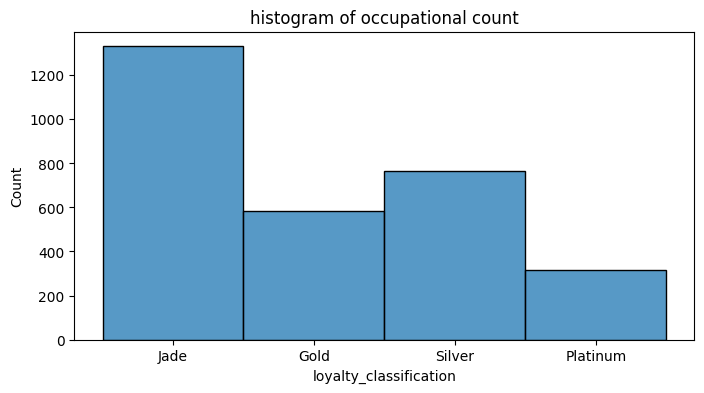

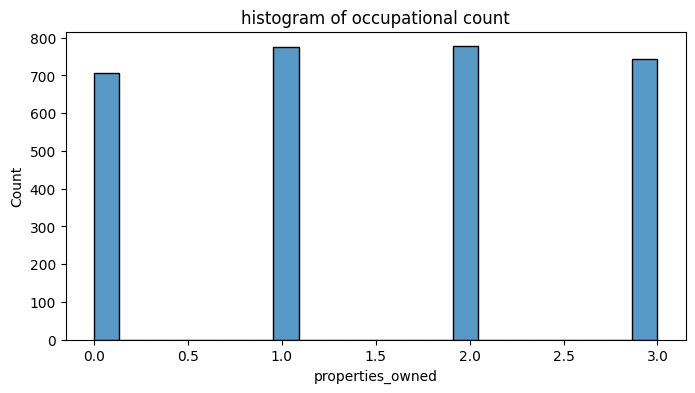

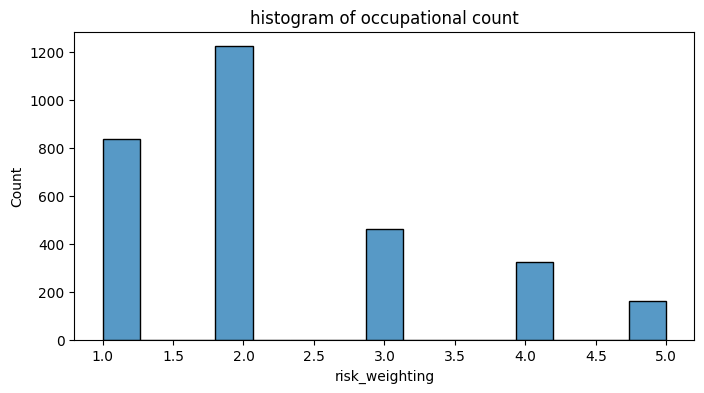

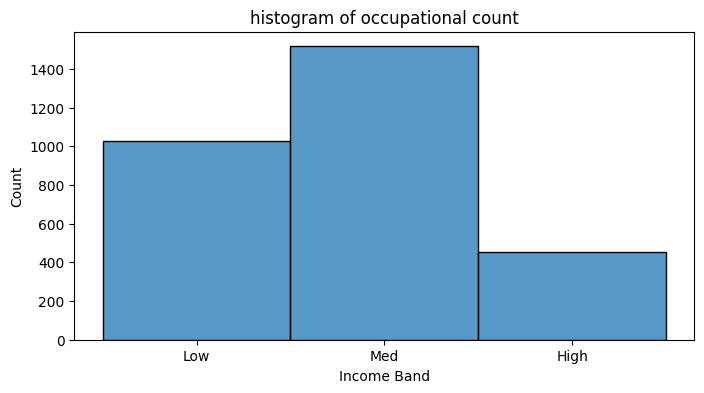

In [17]:
for col in categorical_cols:
    if col=='occupation':
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title('histogram of occupational count')
    plt.xlabel(col)
    plt.ylabel("Count")
    

In [18]:
df

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,gender_id,iaid,Income Band
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Med
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Med
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Med
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,IND66827,Earl Hall,82,8760,2014-10-09,Joshua Bennett,American,Accounting Assistant III,High,Gold,...,532867.88,657849.62,12947.31,1238859.91,1,3,3,2,4,Med
2996,IND40556,Billy Williamson,44,32837,2009-02-05,Dennis Ruiz,European,Paralegal,Mid,Gold,...,56581.74,93195.61,23205.69,277171.07,1,2,3,2,5,Low
2997,IND72414,Victor Black,70,36088,2009-12-29,Joshua Ryan,American,Statistician IV,Low,Jade,...,158726.06,35539.15,30291.81,502947.22,2,2,3,2,6,Low
2998,IND46652,Andrew Ford,56,24871,2006-02-13,Nicholas Cunningham,European,Human Resources Assistant III,Mid,Jade,...,404638.26,56411.33,6413.14,1538368.60,3,1,3,2,7,Med


In [19]:
pd.set_option('display.max_columns', None)
print(df)

     client_id              name  age  location_id joined_bank  \
0     IND81288     Raymond Mills   24        34324  2019-05-06   
1     IND65833     Julia Spencer   23        42205  2001-12-10   
2     IND47499    Stephen Murray   27         7314  2010-01-25   
3     IND72498    Virginia Garza   40        34594  2019-03-28   
4     IND60181   Melissa Sanders   46        41269  2012-07-20   
...        ...               ...  ...          ...         ...   
2995  IND66827         Earl Hall   82         8760  2014-10-09   
2996  IND40556  Billy Williamson   44        32837  2009-02-05   
2997  IND72414      Victor Black   70        36088  2009-12-29   
2998  IND46652       Andrew Ford   56        24871  2006-02-13   
2999  IND40216        Amy Nguyen   79        38518  2005-12-08   

          banking_contact nationality                     occupation  \
0          Anthony Torres    American           Safety Technician IV   
1        Jonathan Hawkins     African            Software Consu

In [26]:
numerical_cols=['estimated_income', 'superannuation_savings', 'checking_accounts','bank_loans', 'bank_deposits', 'saving_accounts' , 'credit_card_balance', 'business_lending']

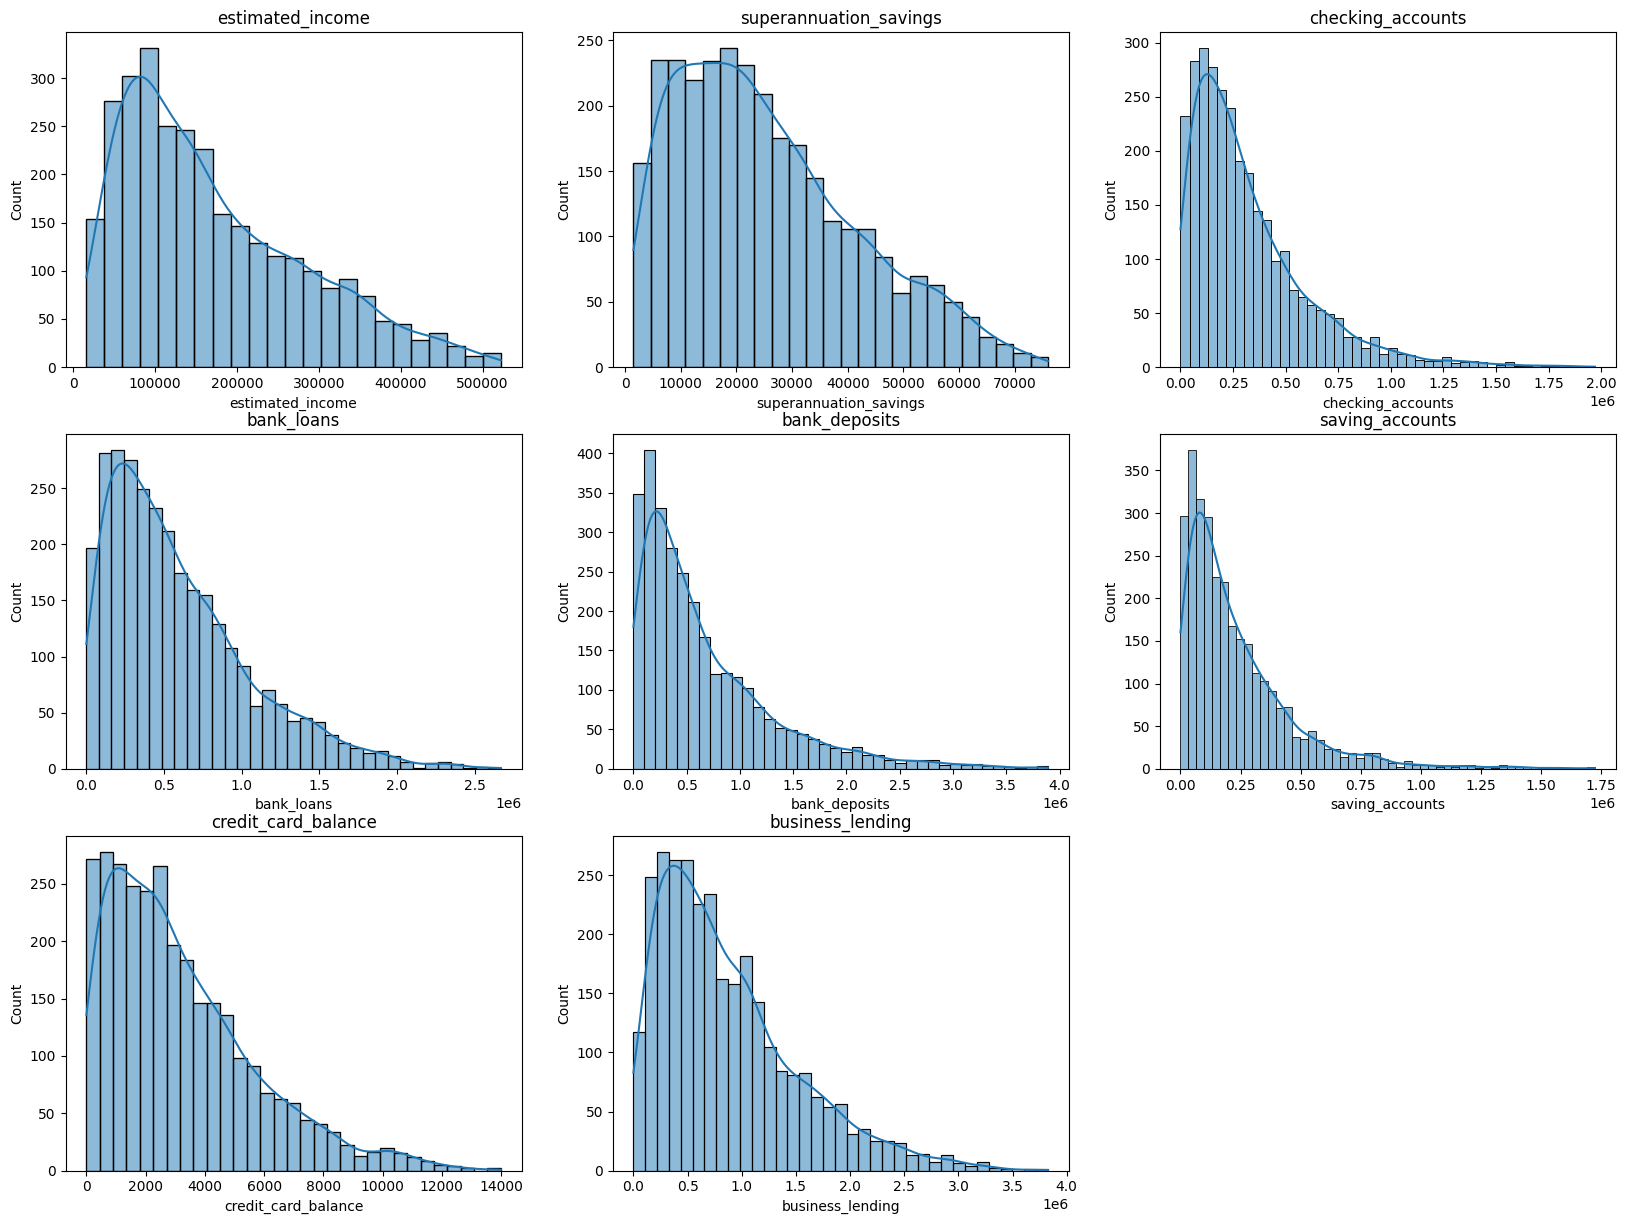

In [27]:
plt.figure(figsize=(20,20))
for i,col in enumerate(numerical_cols):
  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()

## HeatMaps ##

Text(0.5, 1.0, 'Correlation Matrix')

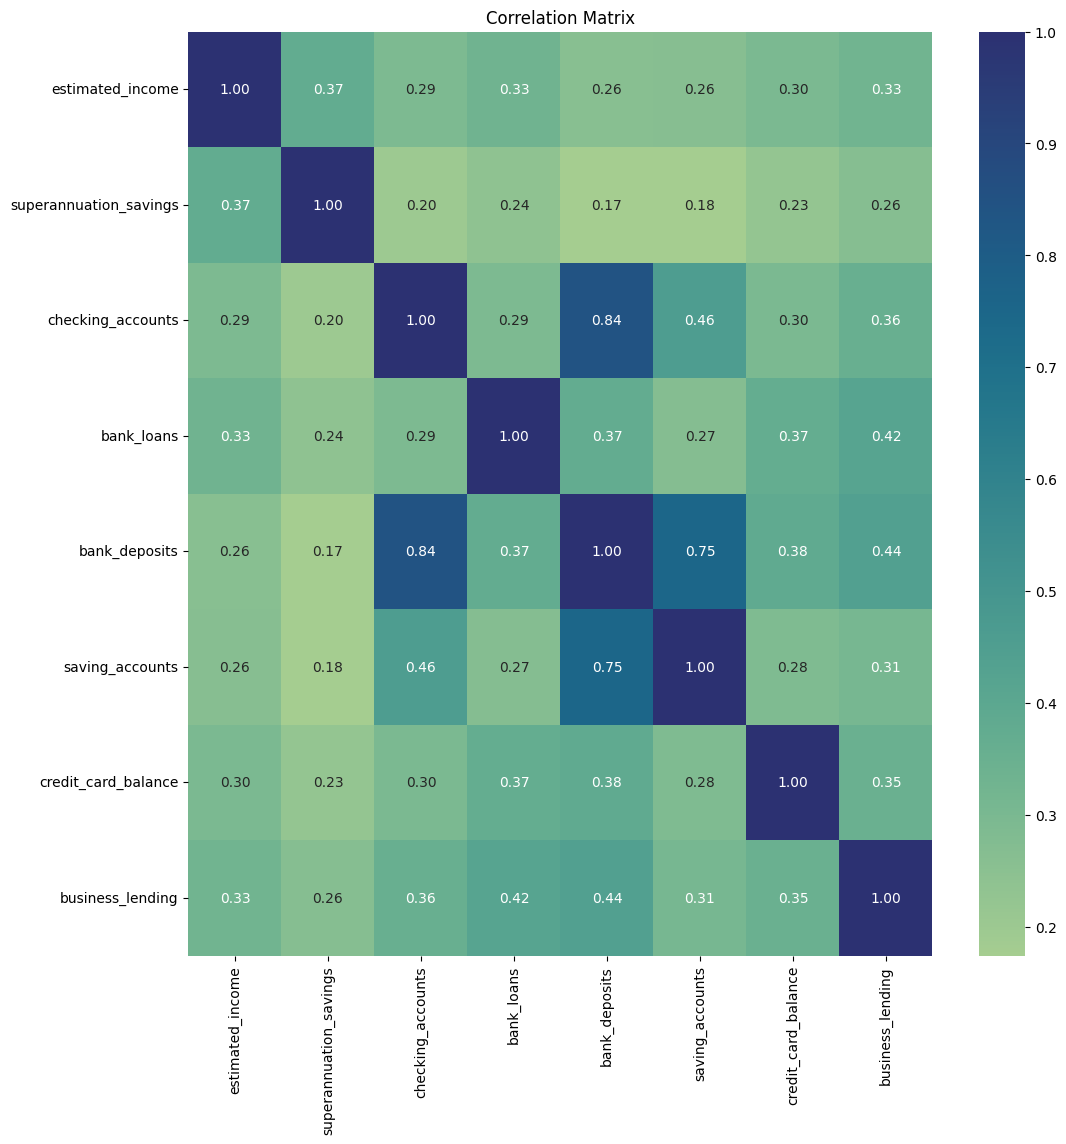

In [28]:
correlation_matrix=df[numerical_cols].corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f')
plt.title("Correlation Matrix")

## Insights:
1. Checking Accounts & Bank Deposits (0.84) and Bank Deposits & Saving Accounts (0.75) have the strongest correlations indicates that a person holding a good amount in one account type often hold a substantial amount in other account types as well. 